In [1]:
import geopandas as gpd
Crosses_Uturns = gpd.read_file("../Data/Crosses_Uturns.shp")
Accidents = gpd.read_file("../Data/Accidents_2017_19.shp")

In [2]:
# Crosses & Uturns alongside the selected road
Crosses_Uturns.head()

,OBJECTID,Name,Segment,geometry
0,1,U_Turns,58,POINT Z (654949.974 4009154.867 0.000)
1,2,U_Turns,58,POINT Z (652609.828 4007888.659 0.000)
2,3,U_Turns,58,POINT Z (651488.789 4007239.460 0.000)
3,4,U_Turns,58,POINT Z (649281.942 4005952.597 0.000)
4,5,U_Turns,57,POINT Z (648535.628 4005474.764 0.000)


In [3]:
# Drop unneeded rows
Accidents = Accidents.drop(columns= Accidents.columns[0:116])
Accidents.head()

,Seg_name,Long_,Lat,ID,Unique_ID,Seg_Cluste,id_1,V1,Symbology_,geometry
0,59,58.778848,36.237378,42.0,59-42,59-0,1.0,0.0,59-0,POINT (659849.322 4011744.759)
1,58,58.739444,36.221944,42.0,58-42,58-0,2.0,0.0,58-0,POINT (656338.846 4009968.371)
2,59,58.779169,36.237341,44.0,59-44,59-0,3.0,0.0,59-0,POINT (659878.254 4011741.249)
3,59,58.758239,36.231234,20.0,59-20,59-1,4.0,1.0,59-1,POINT (658009.534 4011029.401)
4,59,58.769115,36.236176,30.0,59-30,59-2,5.0,2.0,59-2,POINT (658977.042 4011595.446)


In [4]:
# Maintain the original indexing, re-indexing, and drop 18 rows which do not possess a segment
Accidents["OID"] = Accidents.index
Accidents.sort_values(by= "Long_", ascending= False, inplace= True, ignore_index= True)
Accidents.head()

,Seg_name,Long_,Lat,ID,Unique_ID,Seg_Cluste,id_1,V1,Symbology_,geometry,OID
0,0,58.844224,36.185586,18.0,-18,None-No,0.0,0.0,0,POINT (665834.000 4006109.000),871
1,0,58.843926,36.185653,17.0,-17,None-No,0.0,0.0,0,POINT (665807.000 4006116.000),863
2,0,58.843625,36.185708,16.0,-16,None-No,0.0,0.0,0,POINT (665779.833 4006121.569),413
3,0,58.843118,36.185810,15.0,-15,None-No,0.0,0.0,0,POINT (665734.000 4006132.000),867
4,0,58.828524,36.195634,14.0,-14,None-No,0.0,0.0,0,POINT (664401.000 4007197.000),870


In [7]:
# Import SPF data containing Window length alternatives for each segment 
import pandas as pd
SPF_data = pd.read_excel("../Data/SPF_window_alternatives.xlsx",header=2)
SPF_data.head()

,Seg,Y,X1,X2,X3,X4,Alt1,Alt2,Alt3,Alt4,Alt5,Alt6,Alt7,Alt8
0,59,49,4.344300,8076.666667,0.920747,4,794,705,679,494,0,0,0,0
1,58,44,9.025771,8076.666667,0.997145,9,195,589,440,217,100,579,166,0
2,57,35,9.401453,8076.666667,0.744566,7,322,335,484,155,100,254,0,0
3,56,1,0.685524,8076.666667,0.000000,0,0,0,0,0,0,0,0,0
4,55,5,1.494137,8076.666667,0.669283,1,531,0,0,0,0,0,0,0


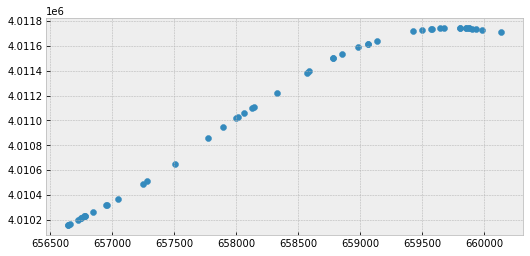

In [8]:
# Visualize accidents (data for the 59th segment only)
import matplotlib.pyplot as plt
plt.style.use('bmh')
Accidents.loc[Accidents["Seg_name"] == 59].plot(figsize=(10,4))
plt.show()

In [10]:
# Window Calculation based on XY locations
my_list = []

# for loop to iterate over all the segments
for seg_code in range(1,60):
    Selected_Accidents = Accidents[Accidents["Seg_name"] == int("{}".format(seg_code))]
    Selected_CUT = Crosses_Uturns[Crosses_Uturns["Segment"] == int("{}".format(seg_code))]
    
    # for loop to iterate over all the window length alts for each segment
    for i in range(1,9):
        distance= SPF_data[SPF_data["Seg"] == int("{}".format(seg_code))]["Alt{}".format(i)].values[0]
        if distance == 0:
            continue
        else:            
            for j in range(0,len(Selected_Accidents)-1):
                # Select all the accidents within each segment
                Selected_Accidents = Accidents[Accidents["Seg_name"] == int("{}".format(seg_code))]
                # Defining starting point for each window jump
                Start_point = Selected_Accidents[j:j+1]
                index = Start_point.index.values[0]
                Unique_ID = Start_point["Unique_ID"].values[0]
                # Defining window length for each jump
                Buf = Start_point["geometry"].buffer(distance= distance)
                # Select all the accidents within each segment which intersect the defined window
                Acc_counts_list = Selected_Accidents[Selected_Accidents.intersects(Buf[Buf.index.values[0]])][Selected_Accidents[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])]["geometry"].x.values <= Start_point["geometry"].x.values]
                j2 = j

                # When the no. of intersected accidents are lower than 2
                if len(Acc_counts_list) < 2:
                    #print("if-1")
                    continue
                
                # When no accidents intersect the window
                elif (j == 0):
                    #print("elif-1")
                    Acc_counts = (Selected_Accidents[Selected_Accidents.intersects(Buf[Buf.index.values[0]])]["geometry"].x.values <= Start_point["geometry"].x.values).sum()
                    CUT_counts = (Selected_CUT[Selected_CUT.intersects(Buf.buffer(50)[Buf.index.values[0]])]["geometry"].x.values <= (Start_point["geometry"].x.values + 50)).sum()
                    my_list.append(['{}'.format(seg_code), '{}'.format(Unique_ID), '{}'.format(distance), '{}'.format(index), '{}'.format(Acc_counts), '{}'.format(CUT_counts)])

                # When there are more than one accident intersected at the starting point
                elif Start_point["geometry"].x.values[0] == Selected_Accidents[j-1:j]["geometry"].x.values[0]:
                    if Start_point["geometry"].x.values[0] == Selected_Accidents[j+1:j+2]["geometry"].x.values[0]:
                        #print("if-2")
                        continue
                    else:
                        if (Selected_Accidents[j-1:j]["geometry"].x.values[0] - Start_point["geometry"].x.values[0]) > 19:
                            Acc_counts = (Selected_Accidents[Selected_Accidents.intersects(Buf[Buf.index.values[0]])]["geometry"].x.values <= Start_point["geometry"].x.values).sum()
                            CUT_counts = (Selected_CUT[Selected_CUT.intersects(Buf.buffer(50)[Buf.index.values[0]])]["geometry"].x.values <= (Start_point["geometry"].x.values + 50)).sum()
                            my_list.append(['{}'.format(seg_code), '{}'.format(Unique_ID), '{}'.format(distance), '{}'.format(index), '{}'.format(Acc_counts), '{}'.format(CUT_counts)])
                        else:
                            continue

                # When the distance between the starting point and the following accident in the window is lower than 20 meters
                elif (Selected_Accidents[j-1:j]["geometry"].x.values[0] - Start_point["geometry"].x.values[0]) < 20:
                    while (Selected_Accidents[j2:j2 + 1]["geometry"].x.values[0] - Start_point["geometry"].x.values[0]) < 20:
                        if j2 < len(Acc_counts_list):
                            j2 += 1
                        else:
                            #print("elif-2")
                            break
                    Start_point2 = Selected_Accidents[j2:j2 + 1]        
                    if j2 != j:
                        Acc_counts = (Selected_Accidents[Selected_Accidents.intersects(Buf[Buf.index.values[0]])]["geometry"].x.values <= Start_point2["geometry"].x.values).sum()
                        CUT_counts = (Selected_CUT[Selected_CUT.intersects(Buf.buffer(50)[Buf.index.values[0]])]["geometry"].x.values <= (Start_point2["geometry"].x.values + 50)).sum()
                        my_list.append(['{}'.format(seg_code), '{}'.format(Unique_ID), '{}'.format(distance), '{}'.format(index), '{}'.format(Acc_counts), '{}'.format(CUT_counts)])

                # When the distance between the starting point and the following accident in the window is more than 20 meters
                elif (Selected_Accidents[j-1:j]["geometry"].x.values[0] - Start_point["geometry"].x.values[0]) > 19:
                    #print("elif-3")
                    Acc_counts = (Selected_Accidents[Selected_Accidents.intersects(Buf[Buf.index.values[0]])]["geometry"].x.values <= Start_point["geometry"].x.values).sum()
                    CUT_counts = (Selected_CUT[Selected_CUT.intersects(Buf.buffer(50)[Buf.index.values[0]])]["geometry"].x.values <= (Start_point["geometry"].x.values + 50)).sum()
                    my_list.append(['{}'.format(seg_code), '{}'.format(Unique_ID), '{}'.format(distance), '{}'.format(index), '{}'.format(Acc_counts), '{}'.format(CUT_counts)])

In [11]:
# Result of window calculation (data for the first segment only)
my_list

[['1', '1-17', '100', '863', '2', '1'],
 ['1', '1-16', '100', '864', '2', '0'],
 ['1', '1-15', '100', '865', '3', '0'],
 ['1', '1-14', '100', '866', '4', '0'],
 ['1', '1-13', '100', '867', '3', '0'],
 ['1', '1-12', '100', '868', '2', '0'],
 ['1', '1-11', '100', '869', '3', '1'],
 ['1', '1-10', '100', '870', '4', '1'],
 ['1', '1-8', '100', '872', '2', '1'],
 ['1', '1-7', '100', '873', '2', '1'],
 ['1', '1-4', '100', '876', '2', '0'],
 ['1', '1-17', '566', '863', '12', '2'],
 ['1', '1-16', '566', '864', '11', '1'],
 ['1', '1-15', '566', '865', '10', '1'],
 ['1', '1-14', '566', '866', '9', '1'],
 ['1', '1-13', '566', '867', '8', '1'],
 ['1', '1-12', '566', '868', '7', '1'],
 ['1', '1-11', '566', '869', '6', '1'],
 ['1', '1-10', '566', '870', '5', '1'],
 ['1', '1-8', '566', '872', '3', '1'],
 ['1', '1-7', '566', '873', '2', '1'],
 ['1', '1-5', '566', '875', '3', '0'],
 ['1', '1-4', '566', '876', '3', '0'],
 ['1', '1-3', '566', '877', '2', '0'],
 ['1', '1-17', '167', '863', '3', '1'],
 ['1'

<AxesSubplot:>

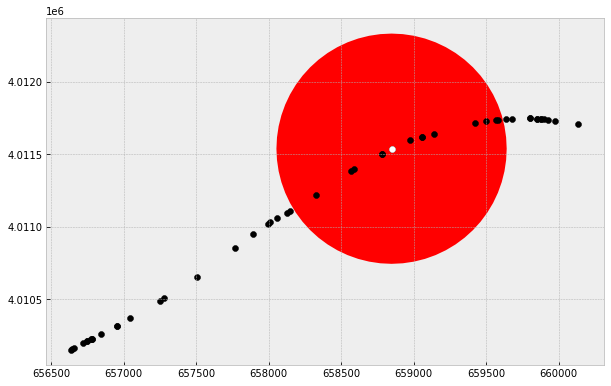

In [26]:
# Visualize window calculation for a random jump 
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
seg_code = 59
j = 20
i = 1
Selected_Accidents = Accidents[Accidents["Seg_name"] == int("{}".format(seg_code))]
distance= SPF_data[SPF_data["Seg"] == int("{}".format(seg_code))]["Alt{}".format(i)].values[0]
Start_point = Selected_Accidents[j:j+1]
Buf = Start_point["geometry"].buffer(distance= distance)

Accidents.loc[Accidents["Seg_name"] == int("{}".format(seg_code))]["geometry"][j:j+1].buffer(distance=distance).plot(ax = ax, color = 'red')
Accidents.loc[Accidents["Seg_name"] == int("{}".format(seg_code))].plot(ax = ax, color= "black")
Accidents.loc[Accidents["Seg_name"] == int("{}".format(seg_code))]["geometry"][j:j+1].plot(ax = ax, color = 'white')

In [ ]:
# Append the calculated features to pandas dataframe and save it to excel file
Stats = pd.DataFrame(columns = ['Seg_code', 'Unique_ID', 'Distance', 'Index', 'Acc_counts', "CUT_counts"])
Stats = Stats.append(pd.DataFrame(my_list, columns=['Seg_code', 'Unique_ID', 'Distance', 'Index', 'Acc_counts', "CUT_counts"]))
Stats.to_excel("Stats.xlsx")